# 10Alytics Hackathon - Complete Dataset Exploration

**Dataset Overview:**
- 23,784 records
- 14 African countries
- 27 economic indicators
- 28 data sources (Central Banks, Statistical Offices)
- Time range: 1960-2025
- Frequencies: Monthly, Quarterly, Yearly

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

## 1. Load Dataset

In [2]:
df = pd.read_csv('10Alytics Hackathon- Fiscal Data.xlsx - Data.csv')

# Convert Time to datetime
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['Year'] = df['Time'].dt.year
df['Month'] = df['Time'].dt.month
df['Quarter'] = df['Time'].dt.quarter

# Convert Amount to numeric (it's stored as object/string)
df['Amount_Numeric'] = pd.to_numeric(df['Amount'], errors='coerce')

print(f"Dataset Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
df.head(10)

Dataset Shape: (23784, 13)

Columns: ['Country', 'Indicator', 'Source', 'Unit', 'Currency', 'Frequency', 'Country Code', 'Time', 'Amount', 'Year', 'Month', 'Quarter', 'Amount_Numeric']


,Country,Indicator,Source,Unit,Currency,Frequency,Country Code,Time,Amount,Year,Month,Quarter,Amount_Numeric
0,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2007-01-01,-56213,2007.0,1.0,1.0,-56213.0
1,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2008-01-01,-67563,2008.0,1.0,1.0,-67563.0
2,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2009-01-01,-72379,2009.0,1.0,1.0,-72379.0
3,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2010-01-01,-98886,2010.0,1.0,1.0,-98886.0
4,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2011-01-01,-134138,2011.0,1.0,1.0,-134138.0
5,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2012-01-01,-165689,2012.0,1.0,1.0,-165689.0
6,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2013-01-01,-246853,2013.0,1.0,1.0,-246853.0
7,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2014-01-01,-254715,2014.0,1.0,1.0,-254715.0
8,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2015-01-01,-284314,2015.0,1.0,1.0,-284314.0
9,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2016-01-01,NaN,2016.0,1.0,1.0,NaN


## 2. Complete Column Analysis

In [ ]:
print("="*80)
print("DATASET STRUCTURE")
print("="*80)
print(f"\nTotal Records: {len(df):,}")
print(f"\nColumn Details:")
df.info()

### 2.1 Countries (14 total)

COUNTRIES IN DATASET
South Africa         (ZAF):  5,108 records (21.48%)
Kenya                (KEN):  2,904 records (12.21%)
Nigeria              (NGA):  2,855 records (12.00%)
Ghana                (GHA):  2,677 records (11.26%)
Egypt                (EGY):  1,845 records ( 7.76%)
Togo                 (TGO):  1,816 records ( 7.64%)
Ivory Coast          (CIV):  1,479 records ( 6.22%)
Rwanda               (RWA):  1,314 records ( 5.52%)
Algeria              (DZA):  1,209 records ( 5.08%)
Tanzania             (TZA):  1,021 records ( 4.29%)
Angola               (AGO):    582 records ( 2.45%)
Senegal              (SEN):    523 records ( 2.20%)
Botswana             (BWA):    274 records ( 1.15%)
Ethiopia             (ETH):    177 records ( 0.74%)


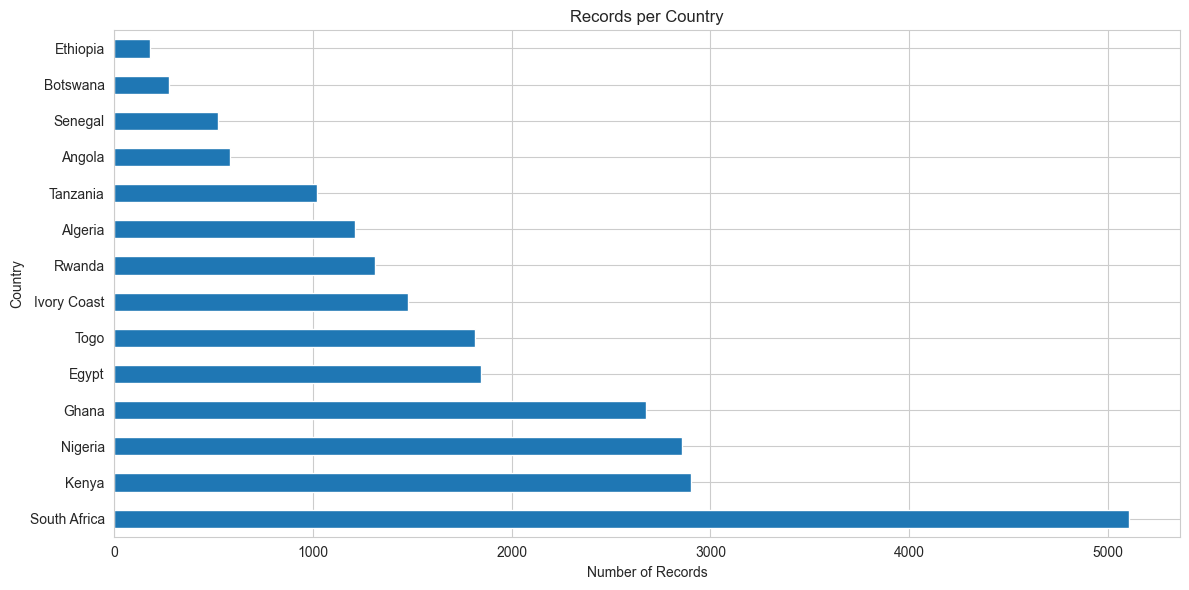

In [4]:
print("COUNTRIES IN DATASET")
print("="*80)
country_counts = df['Country'].value_counts().sort_values(ascending=False)
for country, count in country_counts.items():
    code = df[df['Country'] == country]['Country Code'].iloc[0]
    pct = (count / len(df)) * 100
    print(f"{country:20} ({code}): {count:6,} records ({pct:5.2f}%)")

# Visualize
plt.figure(figsize=(12, 6))
country_counts.plot(kind='barh')
plt.title('Records per Country')
plt.xlabel('Number of Records')
plt.tight_layout()
plt.show()

### 2.2 Indicators (27 total)

In [ ]:
print("\nALL 27 INDICATORS")
print("="*80)
indicator_counts = df['Indicator'].value_counts().sort_values(ascending=False)
for i, (indicator, count) in enumerate(indicator_counts.items(), 1):
    countries = df[df['Indicator'] == indicator]['Country'].nunique()
    print(f"{i:2}. {indicator:35} - {count:5,} records across {countries:2} countries")

# Visualize
plt.figure(figsize=(14, 8))
indicator_counts.plot(kind='barh')
plt.title('Records per Indicator')
plt.xlabel('Number of Records')
plt.tight_layout()
plt.show()

### 2.3 Data Sources (28 total)

In [ ]:
print("\nDATA SOURCES")
print("="*80)
source_counts = df['Source'].value_counts().sort_values(ascending=False)
for source, count in source_counts.items():
    print(f"{source:60} - {count:5,} records")

# Top sources visualization
plt.figure(figsize=(14, 6))
source_counts.head(15).plot(kind='barh')
plt.title('Top 15 Data Sources')
plt.xlabel('Number of Records')
plt.tight_layout()
plt.show()

### 2.4 Units & Currencies

In [ ]:
print("\nUNITS USED")
print("="*80)
print(df['Unit'].value_counts())

print("\n\nCURRENCIES USED (13 different currencies)")
print("="*80)
currency_counts = df['Currency'].value_counts()
for currency, count in currency_counts.items():
    pct = (count / df['Currency'].notna().sum()) * 100
    print(f"{currency:10} - {count:5,} records ({pct:5.2f}%)")

print(f"\nNote: {df['Currency'].isna().sum():,} records have no currency (likely percentages/indices)")

### 2.5 Frequency Distribution

In [ ]:
print("\nDATA FREQUENCY")
print("="*80)
freq_counts = df['Frequency'].value_counts()
for freq, count in freq_counts.items():
    pct = (count / len(df)) * 100
    print(f"{freq:15} - {count:6,} records ({pct:5.2f}%)")

# Visualize
plt.figure(figsize=(10, 6))
freq_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Data Frequency Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

### 2.6 Time Range Analysis

In [ ]:
print("\nTIME RANGE")
print("="*80)
print(f"Earliest Date: {df['Time'].min()}")
print(f"Latest Date: {df['Time'].max()}")
print(f"Year Range: {df['Year'].min()} - {df['Year'].max()}")

# Records per year
print("\nRecords per Year:")
year_counts = df['Year'].value_counts().sort_index()
print(year_counts.tail(20))

# Visualize records over time
plt.figure(figsize=(14, 6))
year_counts.plot(kind='bar')
plt.title('Records per Year')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Data Coverage Matrix

In [ ]:
# Create coverage matrix: Country x Indicator
coverage = pd.crosstab(df['Indicator'], df['Country'])

print("\nDATA COVERAGE: Indicator x Country")
print("="*80)
print(coverage)

# Visualize as heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(coverage, annot=True, fmt='g', cmap='YlOrRd', cbar_kws={'label': 'Number of Records'})
plt.title('Data Coverage: Indicators by Country')
plt.xlabel('Country')
plt.ylabel('Indicator')
plt.tight_layout()
plt.show()

## 4. Data Quality Assessment

In [ ]:
print("="*80)
print("DATA QUALITY REPORT")
print("="*80)

print("\nMissing Values per Column:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing': missing, 'Percentage': missing_pct})
print(missing_df[missing_df['Missing'] > 0])

print(f"\nDuplicate Rows: {df.duplicated().sum()}")

print("\nAmount Field Analysis:")
print(f"  - Total records: {len(df):,}")
print(f"  - Non-null Amount: {df['Amount'].notna().sum():,}")
print(f"  - Null Amount: {df['Amount'].isna().sum():,}")
print(f"  - Numeric Amount: {df['Amount_Numeric'].notna().sum():,}")
print(f"  - Non-numeric Amount: {df['Amount_Numeric'].isna().sum():,}")

## 5. Key Economic Indicators Analysis


INDICATOR: GDP Growth Rate
Records: 962
Countries: ['Algeria', 'Angola', 'Egypt', 'Ethiopia', 'Ghana', 'Ivory Coast', 'Kenya', 'Nigeria', 'Rwanda', 'Senegal', 'South Africa', 'Tanzania', 'Togo']
Date Range: 1982-01-01 00:00:00 to 2025-01-01 00:00:00

Statistics:
count    962.000000
mean       4.042734
std        3.691677
min      -16.420000
25%        2.192500
50%        4.130000
75%        6.000000
max       20.600000
Name: Amount_Numeric, dtype: float64


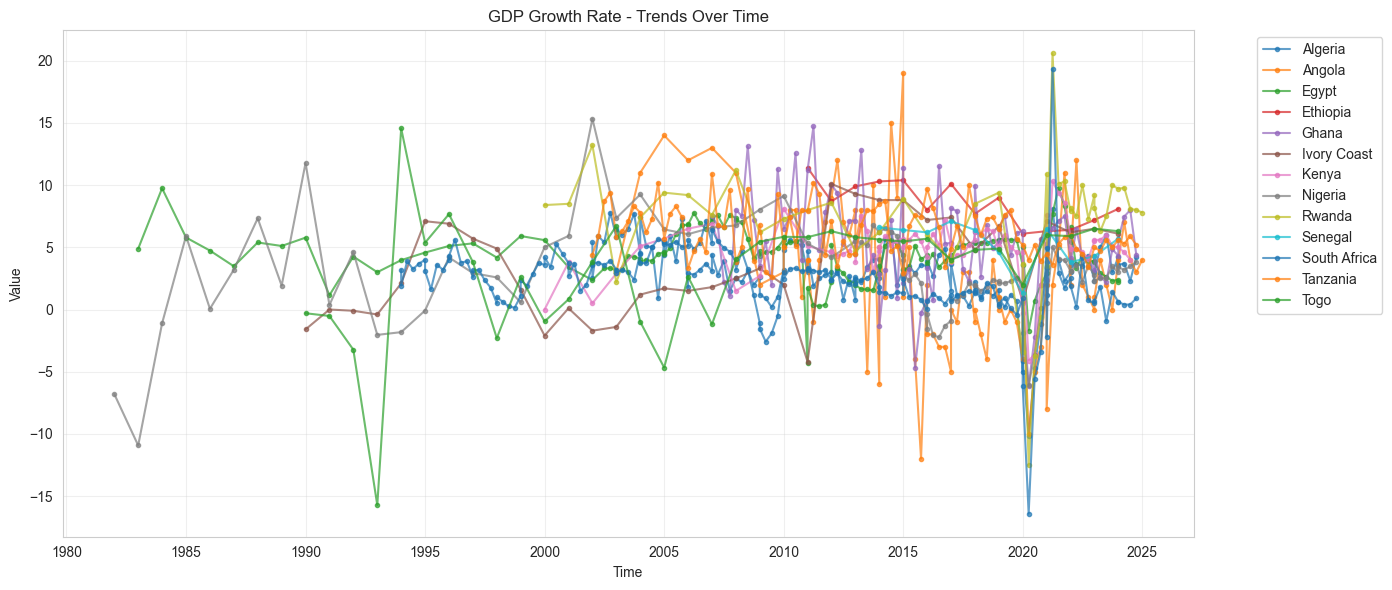


INDICATOR: Inflation Rate
Records: 2,992
Countries: ['Algeria', 'Angola', 'Egypt', 'Ethiopia', 'Ghana', 'Ivory Coast', 'Kenya', 'Nigeria', 'Rwanda', 'South Africa', 'Tanzania', 'Togo']
Date Range: 1960-01-01 00:00:00 to 2025-09-01 00:00:00

Statistics:
count    2992.000000
mean        7.748001
std         7.002627
min        -3.860000
25%         3.297500
50%         5.800000
75%        10.900000
max       101.900000
Name: Amount_Numeric, dtype: float64


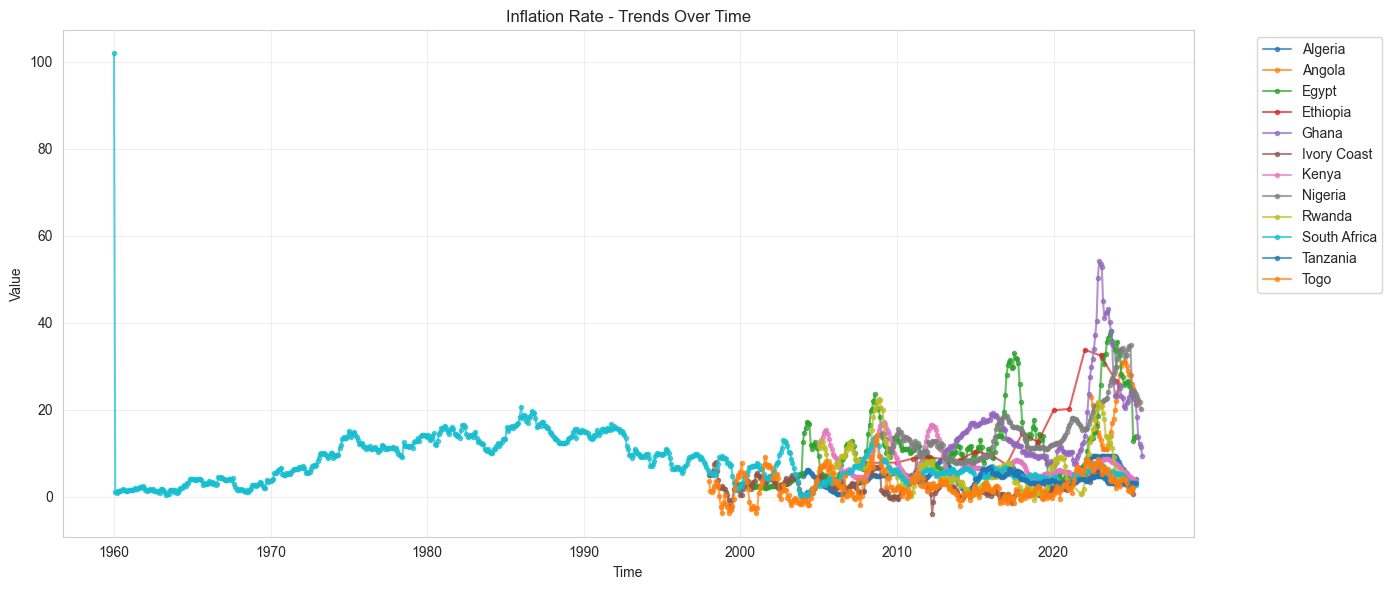


INDICATOR: Government Debt
Records: 1,121
Countries: ['Egypt', 'Ghana', 'Nigeria', 'Rwanda', 'South Africa', 'Togo']
Date Range: 1960-04-01 00:00:00 to 2025-07-01 00:00:00

Statistics:
count    1.121000e+03
mean     1.960209e+06
std      1.044753e+07
min      1.100000e+01
25%      1.396500e+04
50%      5.117777e+04
75%      4.821570e+05
max      1.446655e+08
Name: Amount_Numeric, dtype: float64


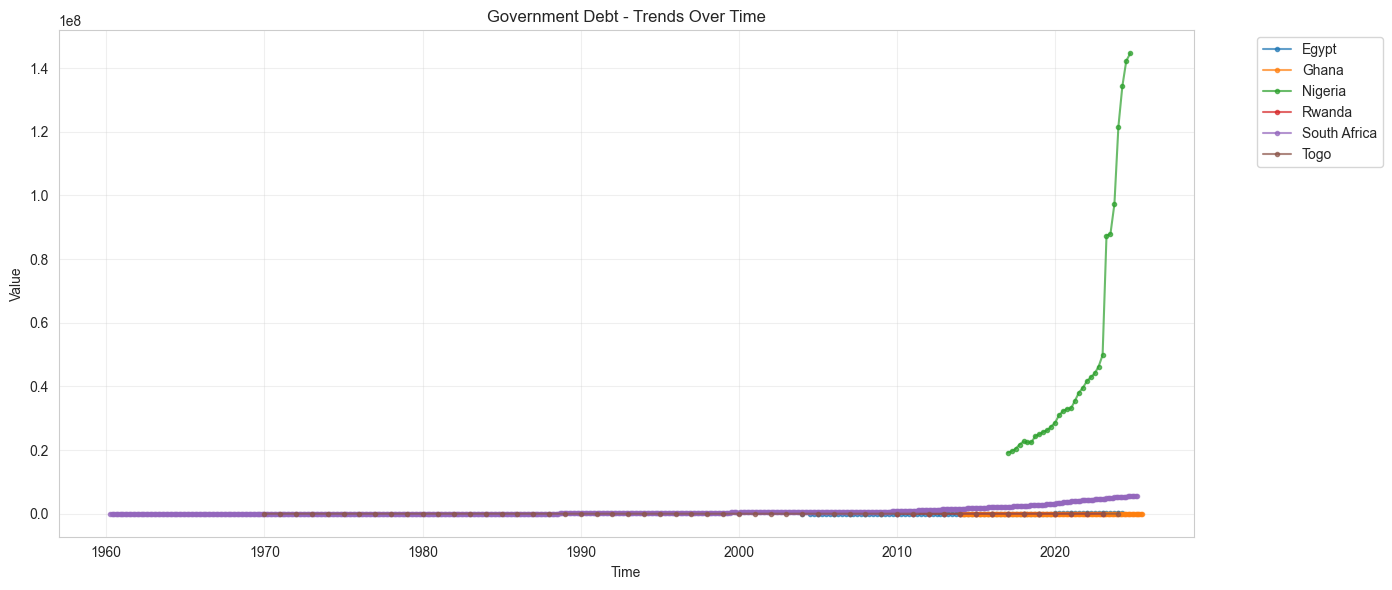


INDICATOR: Budget Deficit/Surplus
Records: 1,412
Countries: ['Egypt', 'Ethiopia', 'Ghana', 'Ivory Coast', 'Nigeria', 'Senegal', 'South Africa', 'Tanzania', 'Togo']
Date Range: 1960-01-01 00:00:00 to 2025-07-01 00:00:00

Statistics:
count    1.412000e+03
mean    -1.564041e+05
std      6.706440e+05
min     -1.350182e+07
25%     -3.819075e+04
50%     -1.007450e+03
75%     -1.880000e+01
max      3.078334e+05
Name: Amount_Numeric, dtype: float64


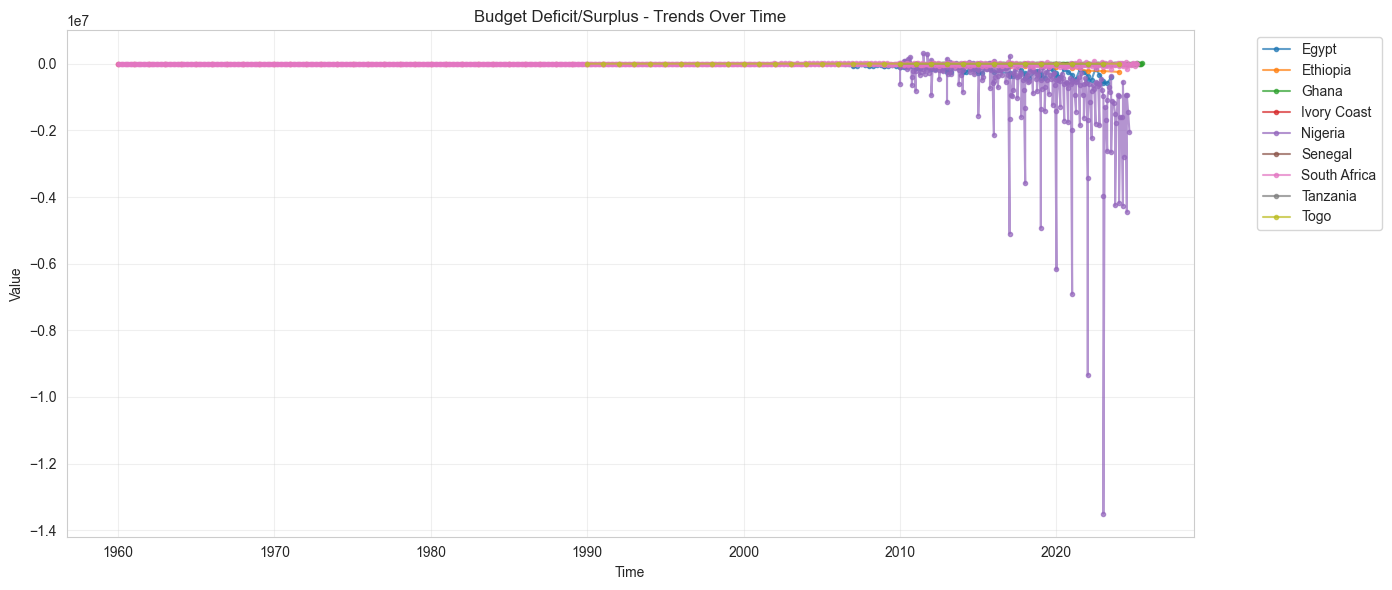


INDICATOR: Unemployment Rate
Records: 218
Countries: ['Botswana', 'Egypt', 'Kenya', 'Nigeria', 'Rwanda', 'South Africa']
Date Range: 1994-01-01 00:00:00 to 2025-01-01 00:00:00

Statistics:
count    218.000000
mean      19.902982
std        8.429953
min        4.700000
25%       12.940000
50%       23.000000
75%       26.000000
max       35.000000
Name: Amount_Numeric, dtype: float64


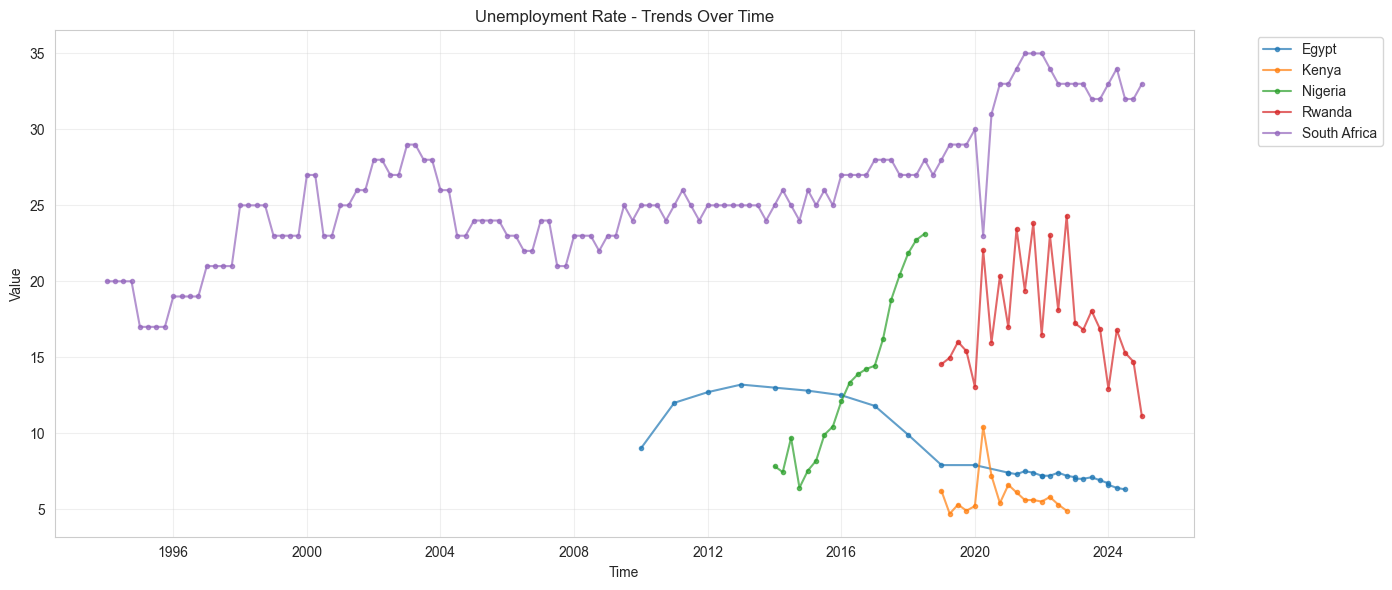


INDICATOR: Interest Rate
Records: 2,648
Countries: ['Angola', 'Botswana', 'Egypt', 'Ethiopia', 'Ghana', 'Ivory Coast', 'Kenya', 'Nigeria', 'Rwanda', 'South Africa', 'Tanzania', 'Togo']
Date Range: 1971-01-01 00:00:00 to 2025-08-01 00:00:00

Statistics:
count    2648.000000
mean       12.277819
std         7.729693
min         2.000000
25%         7.000000
50%        10.000000
75%        14.500000
max        45.000000
Name: Amount_Numeric, dtype: float64


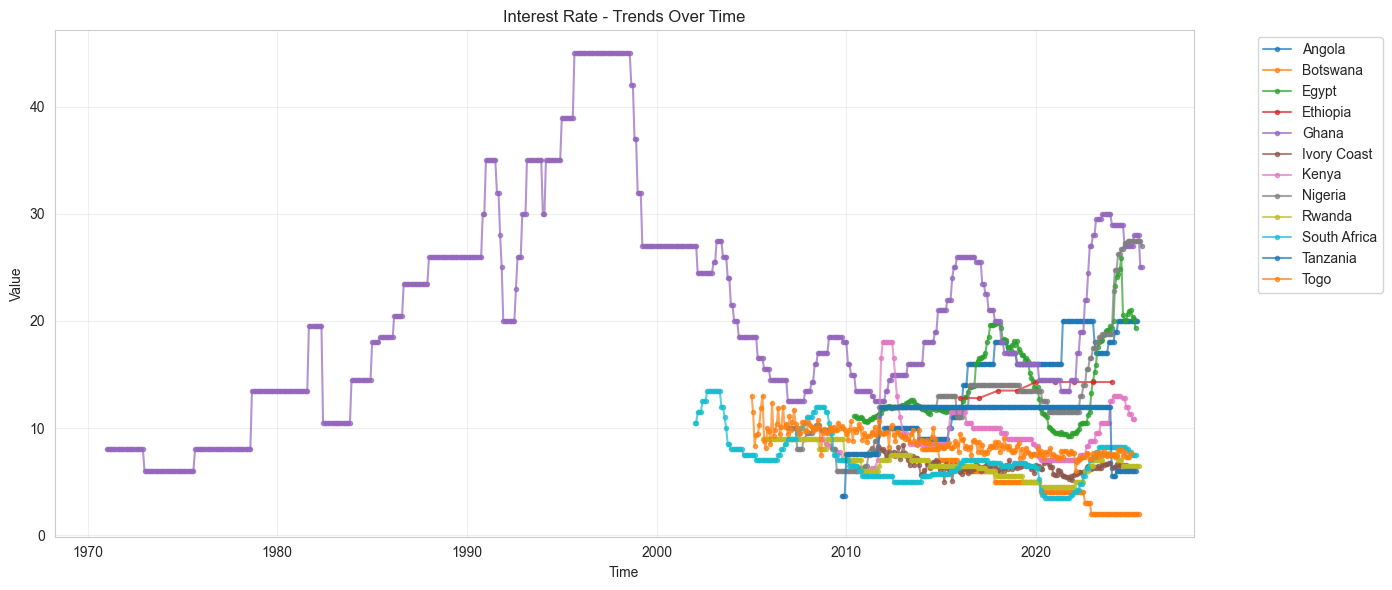


INDICATOR: Exports
Records: 1,520
Countries: ['Algeria', 'Egypt', 'Ethiopia', 'Ghana', 'Ivory Coast', 'Kenya', 'Nigeria', 'Rwanda', 'Senegal', 'South Africa', 'Tanzania', 'Togo']
Date Range: 1964-01-01 00:00:00 to 2025-08-01 00:00:00

Statistics:
count    1.520000e+03
mean     6.459268e+06
std      2.472311e+07
min      4.300000e+00
25%      1.339707e+03
50%      4.312760e+04
75%      7.939528e+05
max      2.308561e+08
Name: Amount_Numeric, dtype: float64


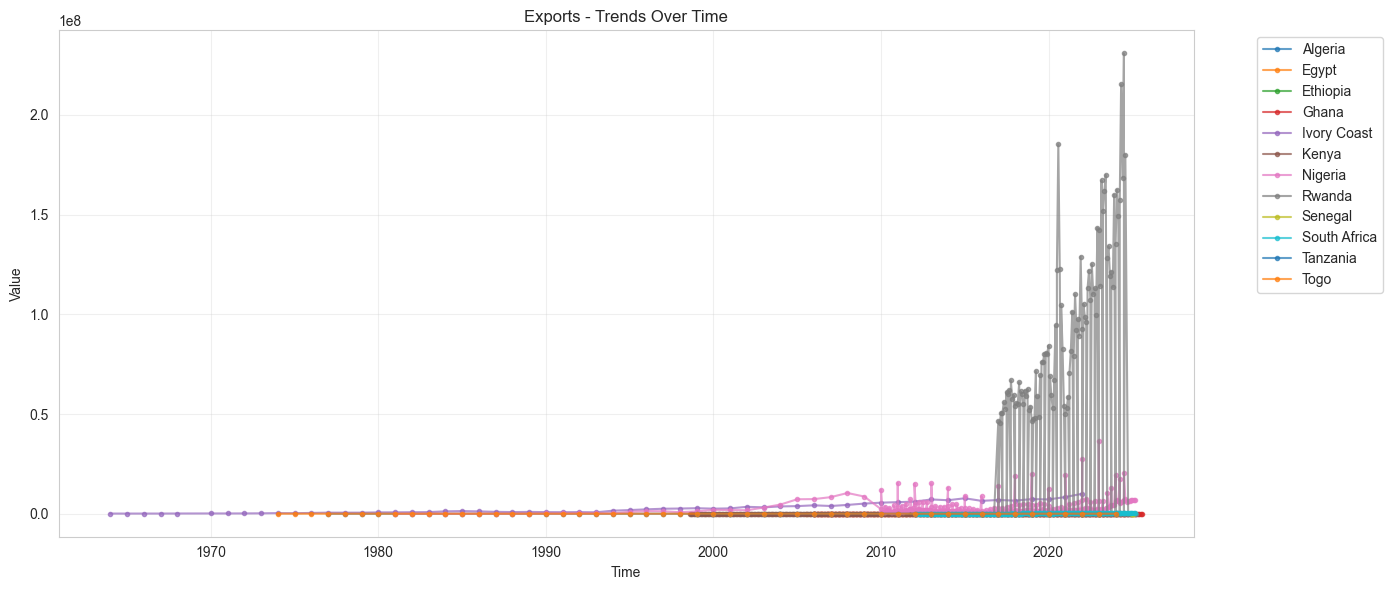


INDICATOR: Imports
Records: 1,512
Countries: ['Algeria', 'Egypt', 'Ethiopia', 'Ghana', 'Ivory Coast', 'Kenya', 'Nigeria', 'Rwanda', 'Senegal', 'South Africa', 'Tanzania', 'Togo']
Date Range: 1965-01-01 00:00:00 to 2025-08-01 00:00:00

Statistics:
count    1.512000e+03
mean     2.243621e+07
std      9.200630e+07
min     -6.210000e+02
25%      1.403590e+03
50%      8.464750e+04
75%      5.387830e+05
max      7.633725e+08
Name: Amount_Numeric, dtype: float64


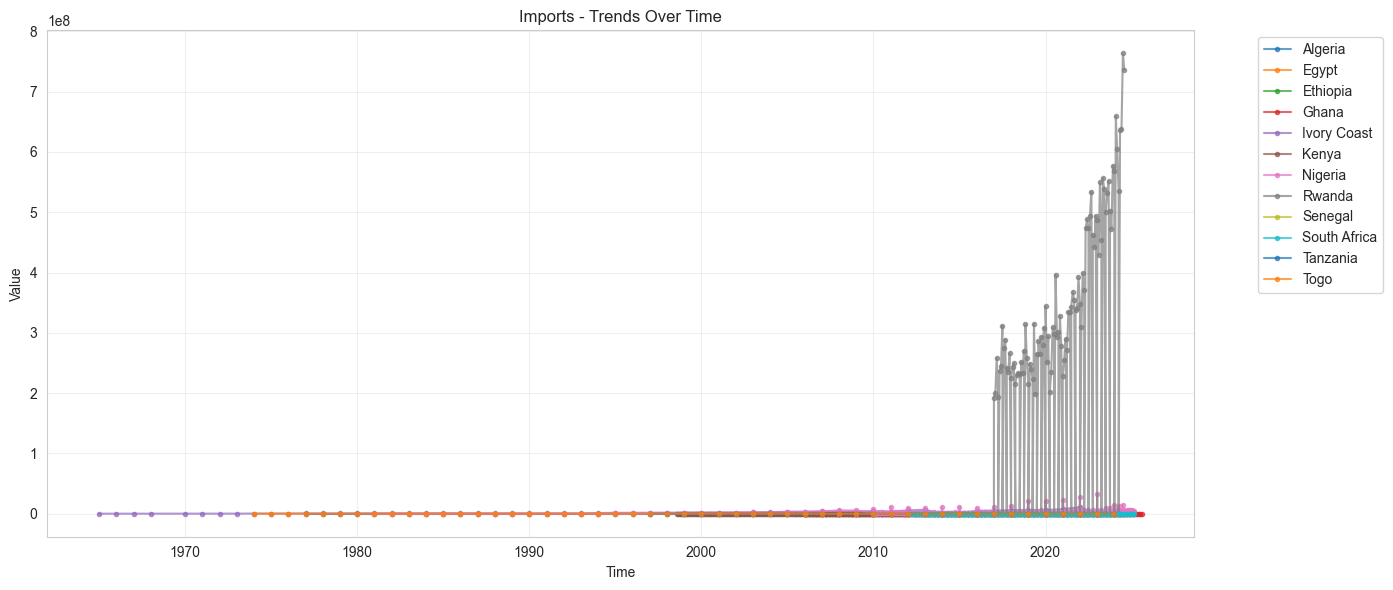

In [5]:
# Focus on major economic indicators
key_indicators = [
    'GDP Growth Rate',
    'Inflation Rate',
    'Government Debt',
    'Budget Deficit/Surplus',
    'Unemployment Rate',
    'Interest Rate',
    'Exports',
    'Imports'
]

for indicator in key_indicators:
    # Handle variations in indicator names
    ind_data = df[df['Indicator'].str.contains(indicator, case=False, na=False)].copy()
    
    if len(ind_data) == 0:
        continue
    
    ind_data = ind_data.dropna(subset=['Amount_Numeric'])
    
    print(f"\n{'='*80}")
    print(f"INDICATOR: {indicator}")
    print(f"{'='*80}")
    print(f"Records: {len(ind_data):,}")
    print(f"Countries: {sorted(ind_data['Country'].unique())}")
    print(f"Date Range: {ind_data['Time'].min()} to {ind_data['Time'].max()}")
    print(f"\nStatistics:")
    print(ind_data['Amount_Numeric'].describe())
    
    # Plot trends
    plt.figure(figsize=(14, 6))
    for country in sorted(ind_data['Country'].unique()):
        country_data = ind_data[ind_data['Country'] == country].sort_values('Time')
        if len(country_data) > 5:  # Only plot if enough data points
            plt.plot(country_data['Time'], country_data['Amount_Numeric'], 
                    marker='o', label=country, alpha=0.7, markersize=3)
    
    plt.title(f'{indicator} - Trends Over Time')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

## 6. Country Deep Dive

In [ ]:
# Analyze each country
for country in sorted(df['Country'].unique()):
    country_data = df[df['Country'] == country].copy()
    
    print(f"\n{'='*80}")
    print(f"COUNTRY: {country}")
    print(f"{'='*80}")
    print(f"Total Records: {len(country_data):,}")
    print(f"Indicators Available: {country_data['Indicator'].nunique()}")
    print(f"Date Range: {country_data['Time'].min()} to {country_data['Time'].max()}")
    print(f"Data Sources: {country_data['Source'].unique()}")
    print(f"\nIndicators:")
    for ind, count in country_data['Indicator'].value_counts().items():
        print(f"  - {ind}: {count} records")

## 7. Export Summary

In [ ]:
# Create comprehensive summary
summary = df.groupby(['Country', 'Indicator']).agg({
    'Amount_Numeric': ['count', 'min', 'max', 'mean', 'std'],
    'Time': ['min', 'max'],
    'Source': 'first',
    'Currency': 'first',
    'Unit': 'first',
    'Frequency': 'first'
}).reset_index()

summary.columns = ['_'.join(col).strip('_') for col in summary.columns.values]
summary.to_csv('complete_data_summary.csv', index=False)
print("\nComplete summary exported to: complete_data_summary.csv")
print(f"\nSummary shape: {summary.shape}")
print(summary.head(20))